In [1]:
pip install tensorflow


                                              0.0/272.8 MB ? eta -:--:--
                                              0.1/272.8 MB 3.3 MB/s eta 0:01:23
                                              0.2/272.8 MB 2.5 MB/s eta 0:01:50
                                              0.3/272.8 MB 2.5 MB/s eta 0:01:48
                                              0.5/272.8 MB 3.0 MB/s eta 0:01:31
                                              0.8/272.8 MB 3.5 MB/s eta 0:01:18
                                              1.0/272.8 MB 3.6 MB/s eta 0:01:15
                                              1.2/272.8 MB 3.8 MB/s eta 0:01:12
                                              1.3/272.8 MB 3.7 MB/s eta 0:01:14
                                              1.5/272.8 MB 3.6 MB/s eta 0:01:15
                                              1.6/272.8 MB 3.5 MB/s eta 0:01:17
                                              1.7/272.8 MB 3.6 MB/s eta 0:01:16
                                              


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------        228.7/272.8 MB 3.1 MB/s eta 0:00:15
     -------------------------------        229.2/272.8 MB 3.1 MB/s eta 0:00:15
     -------------------------------        229.3/272.8 MB 3.1 MB/s eta 0:00:15
     -------------------------------        229.5/272.8 MB 3.1 MB/s eta 0:00:15
     -------------------------------        229.6/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       229.8/272.8 MB 3.1 MB/s eta 0:00:15
     --------------------------------       229.9/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       230.0/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       230.2/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       230.3/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       230.5/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------       230.6/272.8 MB 3.1 MB/s eta 0:00:14
     --------------------------------   

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../")
import pandas as pd
from utils.data_utils import DataLoader

In [4]:
data_loader = DataLoader(file_path='../data/raw/Churn_Modelling.xls' , target_column='Exited', test_size=0.2, random_state=42, clean_data=True)

In [5]:
X, y = data_loader.get_data()

In [20]:
df=data_loader.encoded_data
df

,Age,Balance,CreditScore,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,42,0.00,619,101348.88,1.0,0.0,0.0,1.0,0.0,2,1,1,1
1,41,83807.86,608,112542.58,0.0,0.0,1.0,1.0,0.0,1,1,0,1
2,42,159660.80,502,113931.57,1.0,0.0,0.0,1.0,0.0,8,3,1,0
3,39,0.00,699,93826.63,1.0,0.0,0.0,1.0,0.0,1,2,0,0
4,43,125510.82,850,79084.10,0.0,0.0,1.0,1.0,0.0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,0.00,771,96270.64,1.0,0.0,0.0,0.0,1.0,5,2,1,0
9996,35,57369.61,516,101699.77,1.0,0.0,0.0,0.0,1.0,10,1,1,1
9997,36,0.00,709,42085.58,1.0,0.0,0.0,1.0,0.0,7,1,0,1
9998,42,75075.31,772,92888.52,0.0,1.0,0.0,0.0,1.0,3,2,1,0


In [38]:
X_train, y_train = data_loader.get_train_data_enc()
X_test, y_test = data_loader.get_test_data_enc()

#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape, '\n')

In [23]:
X_train_enc, y_train_enc = data_loader.get_train_data_enc()
X_test_enc, y_test_enc = data_loader.get_test_data_enc()

print(X_train_enc.shape, y_train_enc.shape)
print(X_test_enc.shape, y_test_enc.shape, '\n')

(7893, 13) (7893,)
(1974, 13) (1974,) 



In [35]:
scale_columns = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary', 'Tenure']
scaler = MinMaxScaler()
X_train_enc[scale_columns] = scaler.fit_transform(X_train_enc[scale_columns])
X_test_enc[scale_columns] = scaler.fit_transform(X_test_enc[scale_columns])

In [40]:
X_train_enc

,Age,Balance,CreditScore,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Tenure,NumOfProducts,HasCrCard,IsActiveMember
2496,0.519231,0.000000,0.434,0.605111,1.0,0.0,0.0,1.0,0.0,0.4,2,0,1
726,0.365385,0.000000,0.460,0.385281,1.0,0.0,0.0,0.0,1.0,0.9,2,0,1
4268,0.538462,0.000000,0.806,0.453511,1.0,0.0,0.0,0.0,1.0,0.8,3,1,0
5927,0.480769,0.509930,0.454,0.625558,0.0,1.0,0.0,1.0,0.0,0.3,1,0,0
9264,0.807692,0.000000,0.128,0.469003,0.0,0.0,1.0,0.0,1.0,0.3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,0.230769,0.545275,0.576,0.533025,0.0,0.0,1.0,0.0,1.0,0.9,2,1,1
749,0.538462,0.508413,0.220,0.634622,0.0,1.0,0.0,0.0,1.0,0.4,2,1,1
574,0.423077,0.442132,0.996,0.154009,0.0,0.0,1.0,0.0,1.0,0.3,1,1,1
3827,0.750000,0.466550,0.888,0.466462,0.0,1.0,0.0,0.0,1.0,0.3,1,1,0


In [21]:
#DEALING WITH CLASS IMBALANCE
#smote = SMOTE(sampling_strategy='minority')
#X_rs, y_rs = smote.fit_resample(X, y)

In [39]:
#Without scaling


churn_net =  keras.Sequential([
    keras.layers.Dense(6, input_dim=13, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(6, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer = 'glorot_uniform')
])

churn_net.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_history =churn_net.fit(X_train, y_train, epochs=100,validation_split=0.33,batch_size=10)

print(churn_net.evaluate(X_test, y_test))

y_pred = churn_net.predict(X_test)
y_pred = np.round(y_pred)

print("Classification Report: \n", classification_report(y_test, y_pred))

Epoch 1/100
529/529 [==============================] - 4s 4ms/step - loss: 677.9280 - accuracy: 0.7040 - val_loss: 11.4437 - val_accuracy: 0.2165
Epoch 2/100
529/529 [==============================] - 2s 4ms/step - loss: 8.0475 - accuracy: 0.6736 - val_loss: 8.1209 - val_accuracy: 0.7858
Epoch 3/100
529/529 [==============================] - 2s 4ms/step - loss: 7.6949 - accuracy: 0.6870 - val_loss: 2.5394 - val_accuracy: 0.2326
Epoch 4/100
529/529 [==============================] - 3s 5ms/step - loss: 6.4756 - accuracy: 0.6810 - val_loss: 8.4602 - val_accuracy: 0.7858
Epoch 5/100
529/529 [==============================] - 3s 6ms/step - loss: 5.7040 - accuracy: 0.6764 - val_loss: 17.0558 - val_accuracy: 0.5409
Epoch 6/100
529/529 [==============================] - 4s 8ms/step - loss: 6.2164 - accuracy: 0.6849 - val_loss: 8.7954 - val_accuracy: 0.4649
Epoch 7/100
529/529 [==============================] - 4s 8ms/step - loss: 6.6952 - accuracy: 0.6893 - val_loss: 7.3226 - val_accuracy: 0.

C:\Users\ayesha.amjad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayesha.amjad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayesha.amjad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [42]:
#With scaling

churn_net_en =  keras.Sequential([
    keras.layers.Dense(6, input_dim=13, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(6, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer = 'glorot_uniform')
])

churn_net_en.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_history_en =churn_net_en.fit(X_train_enc, y_train_enc, epochs=100,validation_split=0.33,batch_size=10)

print(churn_net_en.evaluate(X_test_enc, y_test_enc))

y_pred_en = churn_net_en.predict(X_test_enc)
y_pred_en = np.round(y_pred_en)

print("Classification Report: \n", classification_report(y_test_enc, y_pred_en))

Epoch 1/100
529/529 [==============================] - 3s 3ms/step - loss: 0.5299 - accuracy: 0.7965 - val_loss: 0.5108 - val_accuracy: 0.7862
Epoch 2/100
529/529 [==============================] - 2s 4ms/step - loss: 0.4760 - accuracy: 0.8039 - val_loss: 0.4678 - val_accuracy: 0.7988
Epoch 3/100
529/529 [==============================] - 2s 4ms/step - loss: 0.4462 - accuracy: 0.8160 - val_loss: 0.4473 - val_accuracy: 0.8111
Epoch 4/100
529/529 [==============================] - 2s 4ms/step - loss: 0.4295 - accuracy: 0.8245 - val_loss: 0.4391 - val_accuracy: 0.8180
Epoch 5/100
529/529 [==============================] - 2s 4ms/step - loss: 0.4193 - accuracy: 0.8285 - val_loss: 0.4281 - val_accuracy: 0.8253
Epoch 6/100
529/529 [==============================] - 2s 4ms/step - loss: 0.4143 - accuracy: 0.8238 - val_loss: 0.4230 - val_accuracy: 0.8250
Epoch 7/100
529/529 [==============================] - 2s 3ms/step - loss: 0.4116 - accuracy: 0.8239 - val_loss: 0.4207 - val_accuracy: 0.8261

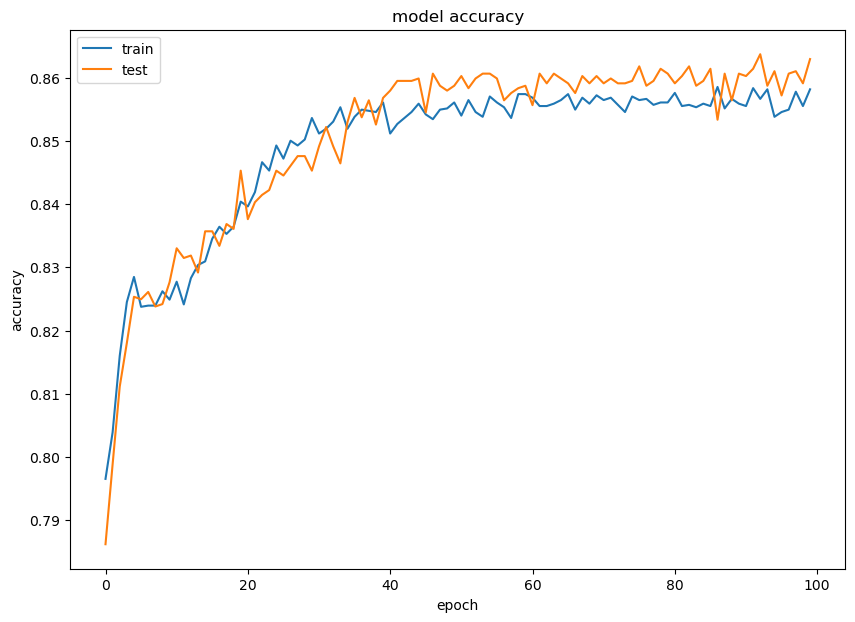

In [44]:
#model accuracy trend against epochs

plt.figure(figsize=(10, 7))
plt.plot(model_history_en.history['accuracy'])
plt.plot(model_history_en.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

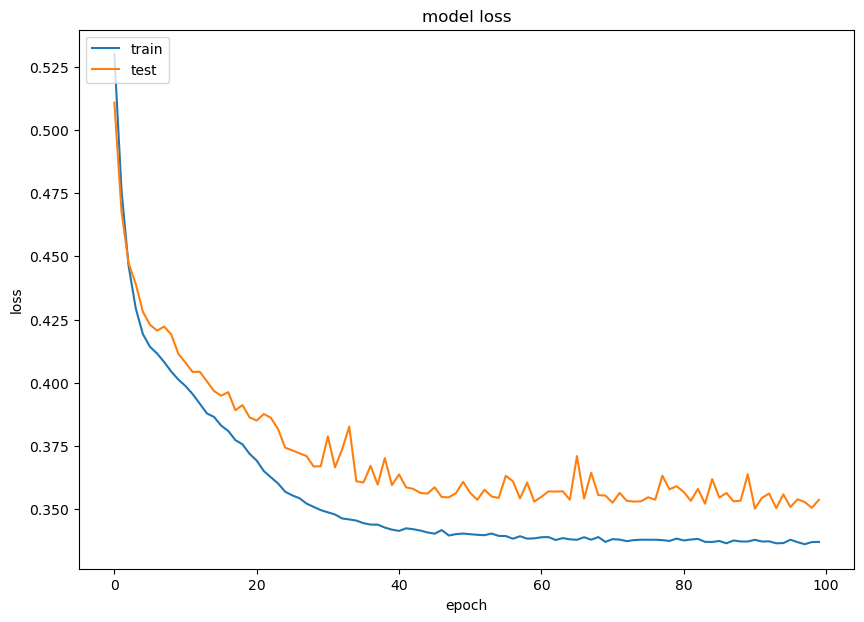

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(model_history_en.history['loss'])
plt.plot(model_history_en.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()